In [10]:
import pandas as pd
import sweetviz

In [3]:
df = pd.read_csv(r"C:\Users\reddy\Downloads\archive (4)\weather_classification_data.csv")

In [12]:
report = sweetviz.analyze(df)

                                             |                                                                …

In [184]:
report.show_html("eda report.html")

Report eda report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [185]:
df.head(50)

Humidity  Precipitation (%)    Cloud Cover  UV Index  Season  \
0         73               82.0  partly cloudy         2  Winter   
1         96               71.0  partly cloudy         7  Spring   
2         64               16.0          clear         5  Spring   
3         83               82.0          clear         7  Spring   
4         74               66.0       overcast         1  Winter   
5         55               26.0       overcast         2  Summer   
6         97               86.0       overcast         1  Winter   
7         85               96.0  partly cloudy         1  Winter   
8         83               66.0       overcast         0  Winter   
9         74              107.0          clear         8  Winter   
10        45               86.0  partly cloudy         2  Spring   
11        43               16.0          clear        11  Autumn   
12        59               25.0  partly cloudy         3  Autumn   
13        87               67.0       overcast         0  Winter   
14        21                8.0          clear         8  Winter   
15        50               46.0  partly cloudy         2  Summer   
16        27               13.0  partly cloudy         5  Spring   
17        51               27.0       overcast         3  Autumn   
18        46               15.0          clear         9  Spring   
19       102               72.0          clear         4  Summer   
20        67               75.0       overcast         1  Winter   
21        88               98.0       overcast         1  Winter   
22        36               18.0          clear         8  Summer   
23        73               29.0       overcast         1  Summer   
24        83              101.0  partly cloudy         4  Spring   
25        79               85.0  partly cloudy         1  Winter   
26        72               62.0       overcast         2  Summer   
27        57               12.0  partly cloudy        11  Winter   
28        61                3.0  partly cloudy         7  Autumn   
29        70               54.0  partly cloudy         0  Winter   
30        85               97.0       overcast         1  Spring   
31        61               63.0       overcast         0  Winter   
32        95               56.0       overcast         1  Winter   
33        97               91.0       overcast        13  Winter   
34        69               15.0          clear        10  Winter   
35        21                6.0          clear         5  Autumn   
36        90               76.0  partly cloudy         0  Winter   
37       105              109.0       overcast         7  Winter   
38        49               58.0  partly cloudy         8  Spring   
39        64               37.0  partly cloudy         3  Autumn   
40        37                9.0  partly cloudy        11  Winter   
41        22                0.0          clear        10  Summer   
42        54               39.0  partly cloudy         3  Winter   
43        64               18.0  partly cloudy         8  Autumn   
44        43               11.0          clear        11  Spring   
45        50               18.0          clear         5  Summer   
46        66               18.0  partly cloudy         3  Autumn   
47        25               14.0  partly cloudy         8  Winter   
48        91               82.0       overcast         3  Summer   
49        98               86.0       overcast         0  Winter   

    Visibility (km)  Location Weather Type  Visibility_(km)  Wind_Speed  \
0             3.500    inland        Rainy            3.500       9.500   
1             7.725    inland       Cloudy            7.725       8.500   
2             5.500  mountain        Sunny            5.500       7.000   
3             2.775   coastal        Sunny            2.775       4.575   
4             2.775  mountain        Rainy            2.775      13.925   
5             5.000    inland       Cloudy            5.000       4.575   
6         

In [121]:
df.columns

Index(['Humidity', 'Precipitation (%)', 'Cloud Cover', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Visibility_(km)',
       'Wind_Speed', 'Atmospheric_Pressure', 'Temperature1'],
      dtype='object')

In [156]:
num = ["Temperature1","Humidity","Wind_Speed","Precipitation (%)","Atmospheric_Pressure","UV Index","Visibility_(km)"]
nomin = ['Location',"Cloud Cover"]
ordin = ["Season"]

In [157]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder

In [158]:
from sklearn.pipeline import Pipeline

In [159]:
numerical = Pipeline([('Mean Imputation',SimpleImputer()),
         ("Scaling",StandardScaler())])

In [160]:
nominal = Pipeline([('Mode Imputation',SimpleImputer(strategy='most_frequent')),
         ('encoding',OneHotEncoder(drop="first"))])

In [161]:
ordinal = Pipeline([('Mode Imputation',SimpleImputer(strategy="most_frequent")),
                 ('encoding',OrdinalEncoder())])

In [162]:
from sklearn.compose import ColumnTransformer

In [163]:
preprocess = ColumnTransformer([("Numerical",numerical,num),
                  ("Nominal",nominal,nomin),
                  ("Ordinal",ordinal,ordin)])

In [179]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
model = Pipeline([('Preprocessing',preprocess),
         ('Model',DecisionTreeClassifier())])

In [166]:
model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('Mean '
                                                                   'Imputation',
                                                                   SimpleImputer()),
                                                                  ('Scaling',
                                                                   StandardScaler())]),
                                                  ['Temperature1', 'Humidity',
                                                   'Wind_Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric_Pressure',
                                                   'UV Index',
                                                   'Visibility_(km)']),
                                                 ('Nominal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Location', 'Cloud Cover']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('Mode '
                                                                   'Imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['Season'])])),
                ('Model', LogisticRegression())])

In [167]:
X = df.drop("Weather Type",axis = 1)


In [168]:
df.head(1)

Humidity  Precipitation (%)    Cloud Cover  UV Index  Season  \
0        73               82.0  partly cloudy         2  Winter   

   Visibility (km) Location Weather Type  Visibility_(km)  Wind_Speed  \
0              3.5   inland        Rainy              3.5         9.5   

   Atmospheric_Pressure  Temperature1  
0               1010.82          14.0

In [169]:
y = df["Weather Type"]

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [171]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 23)

In [181]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8996212121212122

In [176]:
from sklearn.svm import SVC
model = Pipeline([('Preprocessing',preprocess),
         ('Model',SVC())])

In [177]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9011363636363636

In [40]:
import pickle

In [45]:
pickle.dump(model,open("model.pkl","wb"))
pickling = pickle.load(open("model.pkl","rb"))


In [51]:
from feature_engine.outliers import Winsorizer

In [52]:
win = Winsorizer(capping_method='iqr', tail = 'both',fold=0.05)

<Axes: >

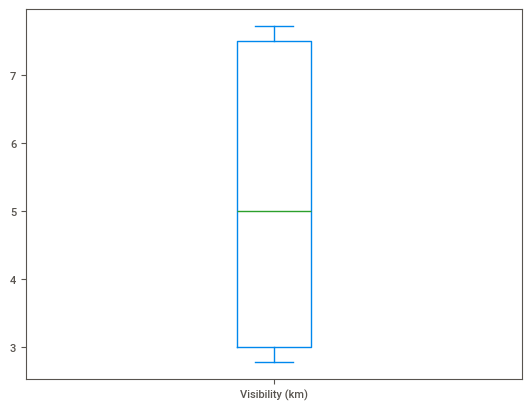

In [99]:
df['Visibility (km)'] = win.fit_transform(df[['Visibility (km)']])
df['Visibility (km)'].plot(kind = "box")

In [ ]:
df.columns

In [90]:
df['Wind Speed'] = win.fit_transform(df[['Wind Speed']])

<Axes: >

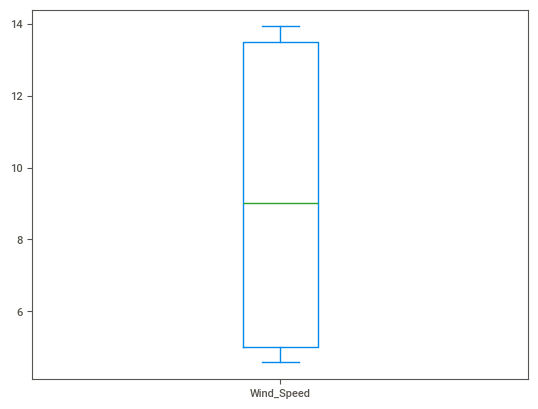

In [91]:
df['Wind_Speed'].plot(kind = "box")

In [92]:
df['Temperature'] = win.fit_transform(df[['Temperature']])

<Axes: >

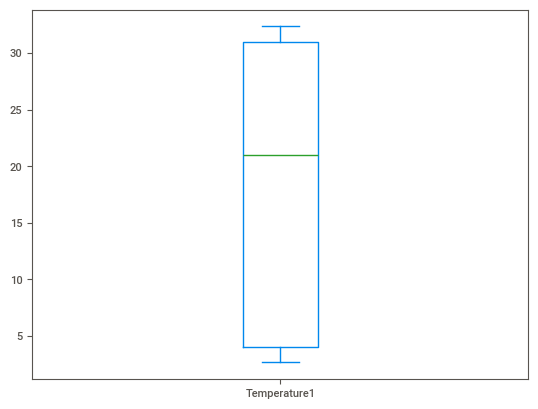

In [118]:
df['Temperature1'].plot(kind = "box")

<Axes: >

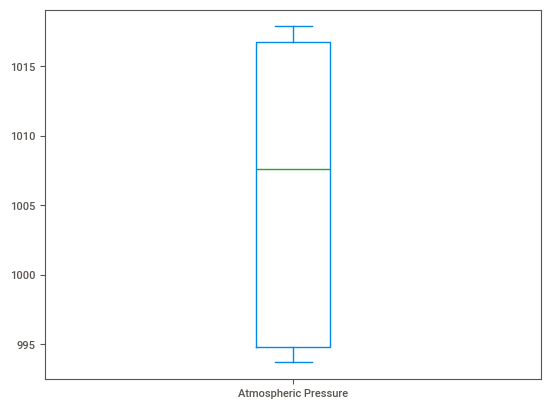

In [97]:
df['Atmospheric Pressure'] = win.fit_transform(df[['Atmospheric Pressure']])
df['Atmospheric Pressure'].plot(kind = "box")

In [102]:
df

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0            14.00        73       9.500               82.0  partly cloudy   
1            32.35        96       8.500               71.0  partly cloudy   
2            30.00        64       7.000               16.0          clear   
3            32.35        83       4.575               82.0          clear   
4            27.00        74      13.925               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195        10.00        74      13.925               71.0       overcast   
13196         2.65        76       4.575               23.0         cloudy   
13197        30.00        77       5.500               28.0       overcast   
13198         3.00        76      10.000               94.0       overcast   
13199         2.65        38       4.575               92.0       overcast   

       Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.820000         2  Winter            3.500    inland   
1               1011.430000         7  Spring            7.725    inland   
2               1017.871125         5  Spring            5.500  mountain   
3               1017.871125         7  Spring            2.775   coastal   
4                993.701375         1  Winter            2.775  mountain   
...                     ...       ...     ...              ...       ...   
13195           1003.150000         1  Summer            2.775  mountain   
13196           1017.871125         1  Winter            6.000   coastal   
13197           1012.690000         3  Autumn            7.725   coastal   
13198            993.701375         0  Winter            2.775    inland   
13199           1015.370000         5  Autumn            7.725  mountain   

      Weather Type  Visibility_(km)  Wind_Speed  temperature  \
0            Rainy            3.500       9.500        14.00   
1           Cloudy            7.725       8.500        32.35   
2            Sunny            5.500       7.000        30.00   
3            Sunny            2.775       4.575        32.35   
4            Rainy            2.775      13.925        27.00   
...            ...              ...         ...          ...   
13195        Rainy            2.775      13.925        10.00   
13196        Snowy            6.000       4.575         2.65   
13197       Cloudy            7.725       5.500        30.00   
13198        Snowy            2.775      10.000         3.00   
13199        Rainy            7.725       4.575         2.65   

       Atmospheric_Pressure  Temperature1  
0               1010.820000         14.00  
1               1011.430000         32.35  
2               1017.871125         30.00  
3               1017.871125         32.35  
4                993.701375         27.00  
...                     ...           ...  
13195           1003.150000         10.00  
13196           1017.871125          2.65  
13197           1012.690000         30.00  
13198            993.701375          3.00  
13199           1015.370000          2.65  

[13200 rows x 16 columns]

In [103]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Visibility_(km)',
       'Wind_Speed', 'temperature', 'Atmospheric_Pressure', 'Temperature1'],
      dtype='object')

In [114]:
df.drop("Wind Speed",axis = 1,inplace = True)

In [115]:
df.columns

Index(['Humidity', 'Precipitation (%)', 'Cloud Cover', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type', 'Visibility_(km)',
       'Wind_Speed', 'Atmospheric_Pressure', 'Temperature1'],
      dtype='object')

In [117]:
df.isnull().sum()

Humidity                0
Precipitation (%)       0
Cloud Cover             0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
Visibility_(km)         0
Wind_Speed              0
Atmospheric_Pressure    0
Temperature1            0
dtype: int64

In [119]:
df

Humidity  Precipitation (%)    Cloud Cover  UV Index  Season  \
0            73               82.0  partly cloudy         2  Winter   
1            96               71.0  partly cloudy         7  Spring   
2            64               16.0          clear         5  Spring   
3            83               82.0          clear         7  Spring   
4            74               66.0       overcast         1  Winter   
...         ...                ...            ...       ...     ...   
13195        74               71.0       overcast         1  Summer   
13196        76               23.0         cloudy         1  Winter   
13197        77               28.0       overcast         3  Autumn   
13198        76               94.0       overcast         0  Winter   
13199        38               92.0       overcast         5  Autumn   

       Visibility (km)  Location Weather Type  Visibility_(km)  Wind_Speed  \
0                3.500    inland        Rainy            3.500       9.500   
1                7.725    inland       Cloudy            7.725       8.500   
2                5.500  mountain        Sunny            5.500       7.000   
3                2.775   coastal        Sunny            2.775       4.575   
4                2.775  mountain        Rainy            2.775      13.925   
...                ...       ...          ...              ...         ...   
13195            2.775  mountain        Rainy            2.775      13.925   
13196            6.000   coastal        Snowy            6.000       4.575   
13197            7.725   coastal       Cloudy            7.725       5.500   
13198            2.775    inland        Snowy            2.775      10.000   
13199            7.725  mountain        Rainy            7.725       4.575   

       Atmospheric_Pressure  Temperature1  
0               1010.820000         14.00  
1               1011.430000         32.35  
2               1017.871125         30.00  
3               1017.871125         32.35  
4                993.701375         27.00  
...                     ...           ...  
13195           1003.150000         10.00  
13196           1017.871125          2.65  
13197           1012.690000         30.00  
13198            993.701375          3.00  
13199           1015.370000          2.65  

[13200 rows x 12 columns]

In [204]:
df["Atmospheric_Pressure"].max()

1017.871125

In [206]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [205]:
df

Humidity  Precipitation (%)    Cloud Cover  UV Index  Season  \
0            73               82.0  partly cloudy         2  Winter   
1            96               71.0  partly cloudy         7  Spring   
2            64               16.0          clear         5  Spring   
3            83               82.0          clear         7  Spring   
4            74               66.0       overcast         1  Winter   
...         ...                ...            ...       ...     ...   
13195        74               71.0       overcast         1  Summer   
13196        76               23.0         cloudy         1  Winter   
13197        77               28.0       overcast         3  Autumn   
13198        76               94.0       overcast         0  Winter   
13199        38               92.0       overcast         5  Autumn   

       Visibility (km)  Location Weather Type  Visibility_(km)  Wind_Speed  \
0                3.500    inland        Rainy            3.500       9.500   
1                7.725    inland       Cloudy            7.725       8.500   
2                5.500  mountain        Sunny            5.500       7.000   
3                2.775   coastal        Sunny            2.775       4.575   
4                2.775  mountain        Rainy            2.775      13.925   
...                ...       ...          ...              ...         ...   
13195            2.775  mountain        Rainy            2.775      13.925   
13196            6.000   coastal        Snowy            6.000       4.575   
13197            7.725   coastal       Cloudy            7.725       5.500   
13198            2.775    inland        Snowy            2.775      10.000   
13199            7.725  mountain        Rainy            7.725       4.575   

       Atmospheric_Pressure  Temperature1  
0               1010.820000         14.00  
1               1011.430000         32.35  
2               1017.871125         30.00  
3               1017.871125         32.35  
4                993.701375         27.00  
...                     ...           ...  
13195           1003.150000         10.00  
13196           1017.871125          2.65  
13197           1012.690000         30.00  
13198            993.701375          3.00  
13199           1015.370000          2.65  

[13200 rows x 12 columns]